In [1]:
#1. Import required libraries
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#2. Read csv
data = pd.read_csv(r'charcters_stats.csv')
df = pd.DataFrame(data)
#print (data)
#print(df)

In [3]:
#3. Show first records from csv
# I used ps.sqldf() to run SQL queries here in python. It is a easy and convienent way to aggregate the data
output = ps.sqldf("select * from df limit 5")
print(output)

          Name Alignment  Intelligence  Strength  Speed  Durability  Power  \
0      3-D Man      good            50        31     43          32     25   
1       A-Bomb      good            38       100     17          80     17   
2   Abe Sapien      good            88        14     35          42     35   
3     Abin Sur      good            50        90     53          64     84   
4  Abomination       bad            63        80     53          90     55   

   Combat  Total  
0      52    233  
1      64    316  
2      85    299  
3      65    406  
4      95    436  


In [4]:
#4. Show number of rows and columns
print("Rows  Cols")
# here I use numpy.shape() to display the size (amount of rows and cols )
np.shape(df)

Rows  Cols


(611, 9)

good       432
bad        165
neutral     11
Name: Alignment, dtype: int64


<AxesSubplot:>

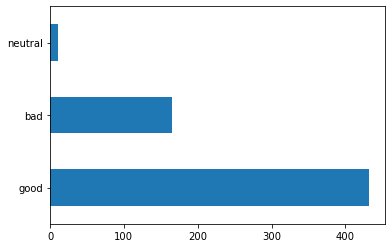

In [5]:
#5. You need to find the values of alignment ,can use value_counts()
# below I use the function value_counts() to quickly count the number of super heros / villans per value
output = df['Alignment'].value_counts()
print(output)
df.Alignment.value_counts().plot(kind = 'barh')

In [6]:
#6. Find out only good alignment holders superheroes
# here i use sqldf again to run a SQL query to pull all the names of those who are good
output = ps.sqldf("select Name from df where Alignment = 'good'")
print(output)

                Name
0            3-D Man
1             A-Bomb
2         Abe Sapien
3           Abin Sur
4        Adam Monroe
..               ...
427            X-Man
428     Yellowjacket
429  Yellowjacket II
430             Ymir
431          Zatanna

[432 rows x 1 columns]


In [7]:
#7. Show first five records which you found in point 6
# I use sqldf to select the top five names of supers who are good
output = ps.sqldf("select Name from df where Alignment = 'good' limit 5")
print(output)

          Name
0      3-D Man
1       A-Bomb
2   Abe Sapien
3     Abin Sur
4  Adam Monroe


In [8]:
#8. Show top five records having top speed of heroes of good alignment
# I use sqldf here to select the top five namea of supers who are good and are the speediest
output = ps.sqldf("select Name, speed from df order by speed desc limit 5")
print(output)

         Name  Speed
0  Air-Walker    100
1       Amazo    100
2     Bizarro    100
3  Black Bolt    100
4     Flash I    100


In [9]:
#9. Show 5 records of super heroes who have maximum power of good alignment
# I use sqldf to select the top five names of supers who are good and have the highest power
output = ps.sqldf("select Name, Power from df where Alignment = 'good' order by Power desc limit 5")
print(output)

            Name  Power
0  Beta Ray Bill    100
1       Beyonder    100
2     Black Bolt    100
3          Cable    100
4        Deadman    100


In [10]:
#10. Find out how many super heroes are there with power 100 of good alignment
# I use sqldf to count the supers who are good and have a power of 100
output1 = ps.sqldf("select count(Power = 100) as 'Good with Power 100' from df where Alignment = 'good' and Power = 100")
print(output)

            Name  Power
0  Beta Ray Bill    100
1       Beyonder    100
2     Black Bolt    100
3          Cable    100
4        Deadman    100


In [11]:
#11. Shape them what you got in point 10
# below i use shape to pull the number of rows and columns of the outputs
x = np.shape(output1)
print("Shape of above output\nRows  Cols\n", x)
output = ps.sqldf("select name from df where Alignment = 'good' and Power = 100")
y = np.shape(output)
print("Shape of total search for above output\nRows  Cols\n", y)

Shape of above output
Rows  Cols
 (1, 1)
Shape of total search for above output
Rows  Cols
 (33, 1)


In [12]:
#12. Show all records from point 10
# Use sqldf to show all the records that match what quesiton 10 asked
output = ps.sqldf("select * from df where Alignment = 'good' and Power = 100")
print(output)


                 Name Alignment  Intelligence  Strength  Speed  Durability  \
0       Beta Ray Bill      good            63        80     35          95   
1            Beyonder      good            88       100     23         100   
2          Black Bolt      good            75        67    100          84   
3               Cable      good            88        48     23          56   
4             Deadman      good            50        10     33         100   
5         Doctor Fate      good            81        16     25          80   
6      Doctor Strange      good           100        10     12          84   
7        Dr Manhattan      good            88        32     42          95   
8           Firestorm      good            50        53     58          56   
9                Goku      good            56       100     75          90   
10         Hal Jordan      good            63        90     53          64   
11             Iceman      good            63        32     53  

In [13]:
#13. Retrieve total of first five records of max power of good alignment super heroes
# here i again use sqldf to pull the top 5 names and their power level by the max power level
output = ps.sqldf("select name, Total, power from df where Alignment = 'good' order by power desc limit 5")
print(output)

            Name  Total  Power
0  Beta Ray Bill    457    100
1       Beyonder    467    100
2     Black Bolt    482    100
3          Cable    395    100
4        Deadman    335    100


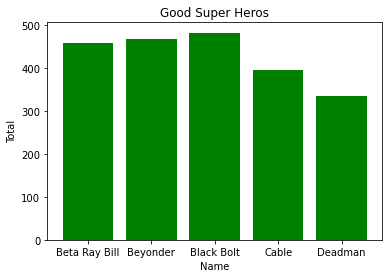

In [14]:
#14. Draw a bar plot of all super heroes who are having good alignment and max power of 
#top five only , take same object of point 13 , show name and total in plot with green
#bars

# use the previous output and grab the name (x) and total (y)
X = output.iloc[:,0]
Y = output.iloc[:,1]
# create the bar graph and set the color to green
plt.bar(X, Y, color='g')
# change the title and the x & y labels
plt.title("Good Super Heros")
plt.xlabel("Name")
plt.ylabel("Total")

plt.show()

In [15]:
#15. Extract villains having bad alignment
# use sqldf to run SQL query that selects the names of all the supers that are bad
output = ps.sqldf("select Name from df where Alignment = 'bad'")
print(output)

               Name
0       Abomination
1           Abraxas
2        Air-Walker
3             Amazo
4              Ammo
..              ...
160            Warp
161       Weapon XI
162  Willis Stryker
163     Yellow Claw
164            Zoom

[165 rows x 1 columns]


In [16]:
#16. Show first five records of point 15
# use sqldf to run SQL query that selects the top 5 names of all the supers that are bad
output = ps.sqldf("select Name from df where Alignment = 'bad' limit 5")
print(output)

          Name
0  Abomination
1      Abraxas
2   Air-Walker
3        Amazo
4         Ammo


In [17]:
#17. Show top five fastest super villains in terms of super speed
# use sqldf to run SQL query that selects the top 5 names of all the supers that are bad and have the highest speed
output = ps.sqldf("select name, speed from df where Alignment = 'bad' order by speed desc limit 5")
print(output)

             Name  Speed
0      Air-Walker    100
1           Amazo    100
2  Superboy-Prime    100
3            Zoom    100
4     General Zod     96


              Name  Intelligence
0  Mister Mxyzptlk           113
1       Apocalypse           100
2         Brainiac           100
3      Doctor Doom           100
4            Joker           100


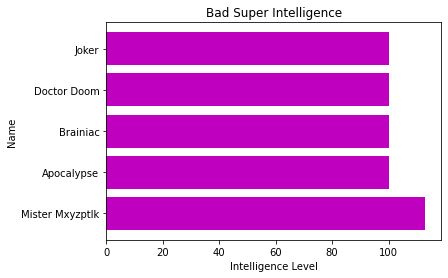

In [18]:
#18. Top five super villains in terms of intelligence
# use sqldf to run SQL query that pulls the top 5 names and intelligence level from the bad supers
output = ps.sqldf("select name, intelligence from df where Alignment = 'bad' order by intelligence desc limit 5")
print(output)
# use the previous output and grab the name (y) and intelligence (x)
X = output.iloc[:,0]
Y = output.iloc[:,1]
# create the bar graph and set the color to green
plt.barh(X, Y, color='m')
# change the title and the x & y labels
plt.title("Bad Super Intelligence")
plt.ylabel("Name")
plt.xlabel("Intelligence Level")
plt.show()

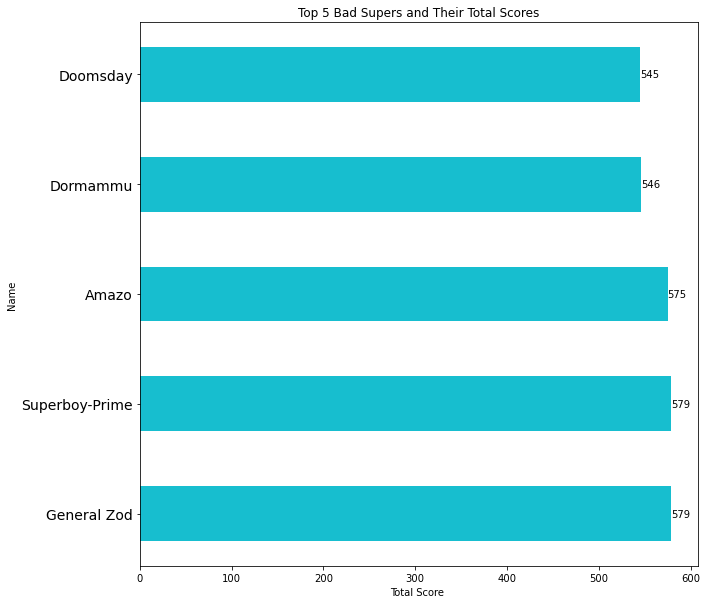

In [19]:
#19. Show who is most dangerous super villain after calculating their total (top 5 only)
# use sqldf to pull the top 5 total scores and their names where the alignment is bad.
output = ps.sqldf("select name, total from df where Alignment = 'bad' order by total desc limit 5")
# print(output)
# use the previous output and grab the name (x) and total (y)
x = output.iloc[:,0]
y = output.iloc[:,1]
# create a horizontal bar graph and set the size
fig, ax = plt.subplots(figsize=(10, 10))
bars = ax.barh(x,y, 0.5, color = 'tab:cyan')
# get the width of the bars so we know where to put the text and set the labels to the total score
for bar in bars:
  width = bar.get_width()
  label_y_pos = bar.get_y() + bar.get_height() / 2
  ax.text(width, label_y_pos, s=f'{width}', va='center')
for tick in ax.yaxis.get_major_ticks():
  tick.label.set_fontsize(14)
# label the graph, the x, and the y axis
plt.title('Top 5 Bad Supers and Their Total Scores')
plt.xlabel('Total Score ')
plt.ylabel('Name')
plt.show()

Text(0.5, 0, 'Speed')

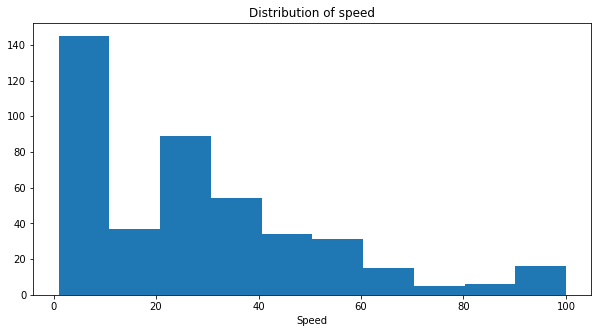

In [20]:
#20. Draw a histogram for speed of super heroes having fig size 10,5 , provide speed in
#histogram for only good alignment super heroes ,title should be "distribution of
#speed" , xlabel should be "speed"
output = ps.sqldf("select speed from df where Alignment = 'good'")
# print(output)
# Creating histogram change the size of the figure
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(output)
# Set title
ax.set_title("Distribution of speed")
# adding labels
ax.set_xlabel('Speed')

Text(0.5, 0, 'Combat')

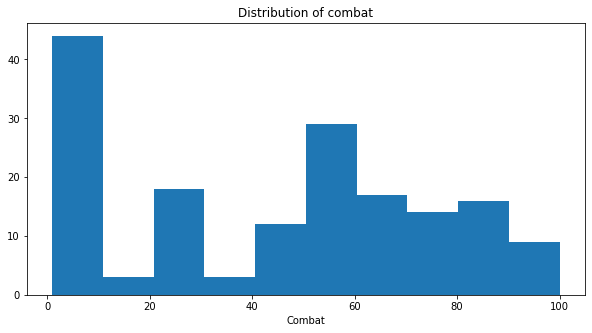

In [21]:
#21. Draw a histogram for combat of super villains having fig size 10,5 , provide combat in
#histogram for only bad alignment super heroes ,title should be "distribution of
#combat" , xlabel should be "combat"
output = ps.sqldf("select combat from df where Alignment = 'bad'")
# print(output)
# Creating histogram change the size of the figure
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(output)
# Set title
ax.set_title("Distribution of combat")
# adding labels
ax.set_xlabel('Combat')

In [22]:
# BONUS: Can go beyond the scope and extract some different information 
# on different characters and their properties. Can draw some more plots 
# and histograms.